In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt  

%matplotlib  inline
print("Modules Imported")

Modules Imported


In [2]:
#Browse in Kaggle found https://www.kaggle.com/vascodegama/uk-covid19-data?select=England_Regions_COVID_Dataset.csv
df = pd.read_csv('England_Regions_COVID_Dataset.csv')

In [3]:
df.shape

(2500, 10)

In [4]:
df.head(15)

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDateRate
0,2020-01-05,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2020-01-10,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2020-01-11,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2020-01-12,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2020-01-13,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2020-01-14,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.insert(1, 'weekday', (pd.to_datetime(df.date).dt.day_name()))

In [6]:
df.head()

,date,weekday,areaName,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDateRate
0,2020-01-05,Sunday,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,Monday,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,Tuesday,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,Wednesday,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,Thursday,South East,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In step 6 i.e.  df.insert(1, 'weekday', (pd.to_datetime(df.date).dt.day_name()))
A new column is being inserted at position 1 called weekday next to date at position 0.  In the column the values of the date column are being converted using the python datetime module and then to the name of the day using pandas 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              2500 non-null   object 
 1   weekday                           2500 non-null   object 
 2   areaName                          2500 non-null   object 
 3   newCasesByPublishDate             2500 non-null   int64  
 4   cumCasesByPublishDate             6 non-null      float64
 5   newDeaths28DaysByPublishDate      2500 non-null   int64  
 6   cumDeaths28DaysByPublishDate      1140 non-null   float64
 7   cumDeaths28DaysByPublishDateRate  1140 non-null   float64
 8   newDeaths28DaysByDeathDate        2114 non-null   float64
 9   cumDeaths28DaysByDeathDate        2114 non-null   float64
 10  cumDeaths28DaysByDeathDateRate    2114 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 215.0+ KB


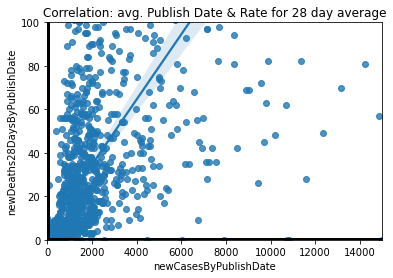

Column: newCasesByPublishDate
- mean: 1025.7584
- std: 1998.5172008342206


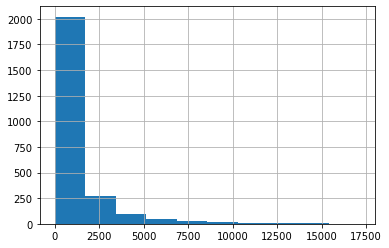

Column: newDeaths28DaysByPublishDate
- mean: 19.9876
- std: 44.641996027998104


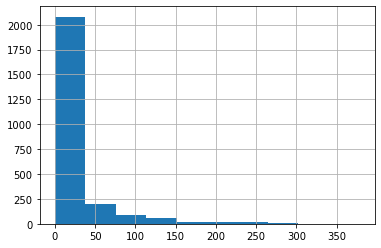

In [23]:
df_avg_dcount = df[['newCasesByPublishDate', 'newDeaths28DaysByPublishDate']]
df_corr_ab = sns.regplot('newCasesByPublishDate', 'newDeaths28DaysByPublishDate', df_avg_dcount)
df_corr_ab.set(xlim=(0, 15000), ylim=(0, 100))
df_corr_ab.axhline(0, color='k', linestyle='-', linewidth=5)
df_corr_ab.axvline(0, color='k', linestyle='-', linewidth=5)
df_corr_ab.axes.set_title('Correlation: avg. Publish Date & Rate for 28 day average')
plt.show()

for entry in df_avg_dcount.columns:
    print("Column: {}".format(entry))
    data = df_avg_dcount.loc[:,entry]
    data.hist()
    print("- mean: {}".format(data.mean()))
    print("- std: {}".format(data.std()))
    plt.show()